In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data_13/homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [3]:
df.shape

(8188, 4)

In [4]:
df.nunique()

timestamp    8188
id           6328
group           2
action          2
dtype: int64

In [5]:
df.group.value_counts()

group
control       4264
experiment    3924
Name: count, dtype: int64

In [6]:
df.action.value_counts()

action
view     6328
click    1860
Name: count, dtype: int64

In [7]:
df.query('action == "click"').id.nunique() / df.query('action == "view"').id.nunique()

0.2939317319848293

In [8]:
df.timestamp.max(), df.timestamp.min()

('2017-01-18 10:24:08.629327', '2016-09-24 17:42:27.839496')

In [20]:
control_df = df.query('group == "control"')
experiment_df = df.query('group == "experiment"')
control_ctr = control_df.query('action == "click"').id.nunique()/control_df.query('action == "view"').id.nunique()
experiment_ctr = experiment_df.query('action == "click"').id.nunique()/experiment_df.query('action == "view"').id.nunique()

obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [14]:
diffs = []
for i in range(10000) : 
    b_samp = df.sample(df.shape[0], replace=True)
    control_bf = b_samp.query('group == "control"')
    experiment_bf = b_samp.query('group == "experiment"')
    control_ctr = control_bf.query('action == "click"').id.nunique()/control_bf.query('action == "view"').id.nunique()
    experiment_ctr = experiment_bf.query('action == "click"').id.nunique()/experiment_bf.query('action == "view"').id.nunique()
    diffs.append (experiment_ctr - control_ctr)


(array([  30.,  192.,  725., 1730., 2610., 2494., 1454.,  593.,  145.,
          27.]),
 array([-0.01044267, -0.0021846 ,  0.00607347,  0.01433153,  0.0225896 ,
         0.03084767,  0.03910573,  0.0473638 ,  0.05562187,  0.06387993,
         0.072138  ]),
 <BarContainer object of 10 artists>)

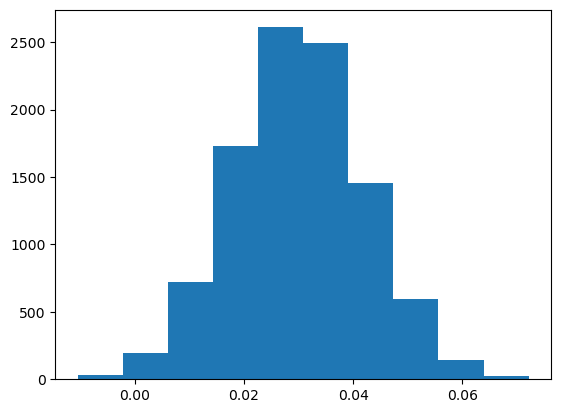

In [22]:
plt.hist(diffs)

In [26]:
diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), diffs.size)

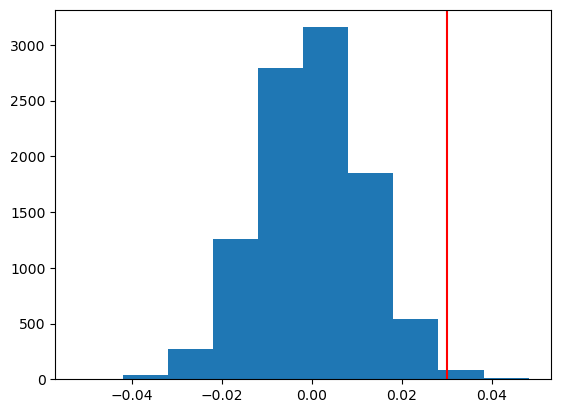

In [27]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color = 'red')

In [28]:
(null_vals > obs_diff).mean()

0.0065

In [ ]:
# With a p value approximately a half of one percent, the difference in CTR for control and experiment groups does appear to be significant. We can reject the null hypothesis